In [1]:
train_img_dir = '/home/chuyenmt/git/DecodeItAll/Chuyen_explore/kvasir-capsule-seg/KvasirCapsule-SEG/images'
train_1st_mask_dir = '/home/chuyenmt/git/DecodeItAll/Chuyen_explore/kvasir-capsule-seg/KvasirCapsule-SEG/masks'

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import numpy as np
import cv2
from PIL import Image

import torch
from torch import nn
from torch.optim import Adam
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torchvision as tv
import torch.nn.functional as F
from torch import Tensor

In [3]:
from torch.utils.data import Dataset, DataLoader
class Kvasir(Dataset):
    def __init__(self, transform = None, target_transform = None):
        from glob import glob
        self.imgs = sorted(glob(train_img_dir + "/*"))
        self.msks = sorted(glob(train_1st_mask_dir + "/*"))
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        img_path = self.imgs[idx]
        msk_path = self.msks[idx]

        img = Image.open(img_path)
        msk = Image.open(msk_path)

        if self.transform:
            img = self.transform(img)

        if self.target_transform:
            msk = self.target_transform(msk)

        return (img, msk)

55


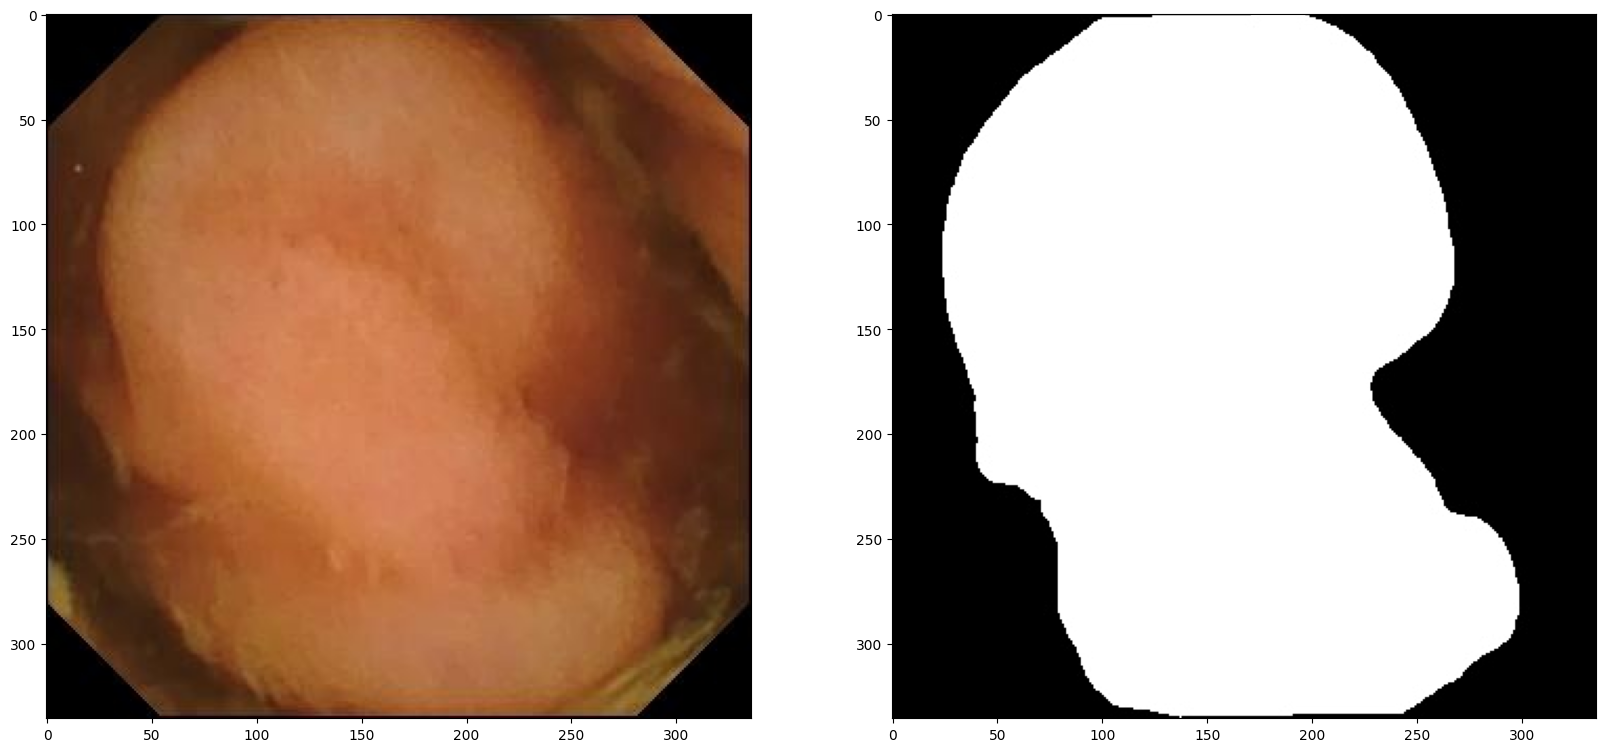

In [12]:
from torch.utils.data import DataLoader
from torchvision import transforms
from PIL import Image
transform = transforms.Compose(
    [
        # transforms.Resize((256, 512)),
        transforms.ToTensor(),
        #transforms.RandomResizedCrop(size=(224, 224), antialias=True),
        #transforms.RandomHorizontalFlip(p=0.5),
        #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), của image net
    ]
)

target_transform = transforms.Compose(
    [
        # transforms.Resize((256, 512)),
        transforms.ToTensor(),
    ]
)

Data_transfered = Kvasir(transform = transform, target_transform=target_transform)

print(len(train_ds))

img, msk = train_ds[0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))

ax1.imshow(img.permute(1, -1, 0).numpy())
ax2.imshow(msk.permute(1, -1, 0).numpy(), cmap = 'gray')

In [13]:
Data_loaded = DataLoader(Data_transfered, batch_size=5, shuffle=True)

print(len(Data_loaded))
print(type(Data_loaded))

11
<class 'torch.utils.data.dataloader.DataLoader'>
